<a href="https://colab.research.google.com/github/anaconda121/Deep-Learning/blob/main/Preprocessing/Mini_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import seaborn as sns
import math

In [3]:
sns.set()

In [4]:
data_raw = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/NFLRush.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
data_raw.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,NflId,DisplayName,JerseyNumber,Season,YardLine,Quarter,GameClock,PossessionTeam,Down,Distance,FieldPosition,HomeScoreBeforePlay,VisitorScoreBeforePlay,NflIdRusher,OffenseFormation,OffensePersonnel,DefendersInTheBox,DefensePersonnel,PlayDirection,TimeHandoff,TimeSnap,Yards,PlayerHeight,PlayerWeight,PlayerBirthDate,PlayerCollegeName,Position,HomeTeamAbbr,VisitorTeamAbbr,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,212,12/29/1988,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,288,03/25/1989,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,270,01/21/1989,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-3,245,11/22/1982,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,2530794,Ron Parker,38,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08T00:44:06.000Z,2017-09-08T00:44:05.000Z,8,6-0,206,08/17/1987,Newberry,FS,NE,KC,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW


In [6]:
data_raw.shape

(509762, 49)

In [7]:
data_raw.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

In [8]:
data_raw["Yards"]

0          8
1          8
2          8
3          8
4          8
          ..
509757    11
509758    11
509759    11
509760    11
509761    11
Name: Yards, Length: 509762, dtype: int64

In [9]:
len(data_raw[data_raw["PlayId"] == 20181115001638])

22

In [10]:
specific_play = data_raw[data_raw["PlayId"] == 20181115001638]

In [11]:
"""
1. The features YardLine, Quarter, and PossessionTeam among others tell us important information about this play.
2. The features DisplayName, JerseyNumber, and Dir among others tell us information about each player on the field.
"""

'\n1. The features YardLine, Quarter, and PossessionTeam among others tell us important information about this play.\n2. The features DisplayName, JerseyNumber, and Dir among others tell us information about each player on the field.\n'

In [12]:
three_players_box = data_raw[data_raw["DefendersInTheBox"] == 3]

In [13]:
data_raw[data_raw["DefendersInTheBox"] == 3].value_counts("PlayId").shape[0]

18

In [14]:
len(three_players_box), len(three_players_box["PlayId"].unique()), (len(three_players_box) / len(data_raw) * 100)

(396, 18, 0.07768331103534591)

In [15]:
"""
We know that there are 22 players per play, and 396 players showed up in our query, therefore 396 / 22 = 18 unique plays should show up.
Approx. 0.00077% of plays have three players in the box, therefore it is quite uncommon. 
"""

'\nWe know that there are 22 players per play, and 396 players showed up in our query, therefore 396 / 22 = 18 unique plays should show up.\nApprox. 0.00077% of plays have three players in the box, therefore it is quite uncommon. \n'

In [16]:
michael_thomas = data_raw[data_raw["DisplayName"] == "Michael Thomas"]
len(michael_thomas["GameId"].unique()) # people with the name Michael Thomas played 50 NFL games

50

In [17]:
michael_thomas_players = michael_thomas["NflId"].unique()
michael_thomas_players # there are 2 michael thomas's in the dataset!

array([2556370, 2535687])

In [18]:
mt1 = michael_thomas[michael_thomas["NflId"] == michael_thomas_players[0]]
mt2 = michael_thomas[michael_thomas["NflId"] == michael_thomas_players[1]]

len(mt1["GameId"].unique()), len(mt2["GameId"].unique())

# since 32 + 19 = 51, it appears like both of them must have played in the same game!

(32, 19)

In [19]:
print(data_raw[data_raw["DisplayName"] == "Michael Thomas"].groupby(["NflId"])["GameId"].value_counts())

NflId    GameId    
2535687  2018121608    38
         2017102600    28
         2017110510    23
         2018123008    18
         2018120908    15
         2018120207    14
         2018122300    14
         2017092408    13
         2017112604    13
         2018112506    13
         2018111200    11
         2018092303     8
         2017100100     4
         2018111805     4
         2018102200     3
         2018090907     2
         2018100701     2
         2018102806     2
         2018101100     1
2556370  2018102101    29
         2017111200    28
         2018121700    27
         2018102811    26
         2017101504    25
         2018093011    25
         2018110409    25
         2018120907    25
         2018112202    24
         2017121705    23
         2017102203    22
         2018111809    22
         2017100100    21
         2017110503    21
         2017123110    21
         2018092300    21
         2018111101    21
         2017091100    19
         201709240

In [20]:
print(data_raw[data_raw["DisplayName"] == "Michael Thomas"].groupby(["NflId", "GameId"])["PlayId"].count())

NflId    GameId    
2535687  2017092408    13
         2017100100     4
         2017102600    28
         2017110510    23
         2017112604    13
         2018090907     2
         2018092303     8
         2018100701     2
         2018101100     1
         2018102200     3
         2018102806     2
         2018111200    11
         2018111805     4
         2018112506    13
         2018120207    14
         2018120908    15
         2018121608    38
         2018122300    14
         2018123008    18
2556370  2017091100    19
         2017091705    11
         2017092402    18
         2017100100    21
         2017101504    25
         2017102203    22
         2017102904    17
         2017110503    21
         2017111200    28
         2017111905    12
         2017112607     8
         2017120307    16
         2017120700    10
         2017121705    23
         2017122405    16
         2017123110    21
         2018090906    13
         2018091603    18
         201809230

In [21]:
data_raw.columns

Index(['GameId', 'PlayId', 'Team', 'X', 'Y', 'S', 'A', 'Dis', 'Orientation',
       'Dir', 'NflId', 'DisplayName', 'JerseyNumber', 'Season', 'YardLine',
       'Quarter', 'GameClock', 'PossessionTeam', 'Down', 'Distance',
       'FieldPosition', 'HomeScoreBeforePlay', 'VisitorScoreBeforePlay',
       'NflIdRusher', 'OffenseFormation', 'OffensePersonnel',
       'DefendersInTheBox', 'DefensePersonnel', 'PlayDirection', 'TimeHandoff',
       'TimeSnap', 'Yards', 'PlayerHeight', 'PlayerWeight', 'PlayerBirthDate',
       'PlayerCollegeName', 'Position', 'HomeTeamAbbr', 'VisitorTeamAbbr',
       'Week', 'Stadium', 'Location', 'StadiumType', 'Turf', 'GameWeather',
       'Temperature', 'Humidity', 'WindSpeed', 'WindDirection'],
      dtype='object')

In [22]:
data_raw.groupby(["Stadium", "Season"])["PlayId"].count()

Stadium                        Season
AT&T Stadium                   2017      8448
                               2018      7502
Arrowhead Stadium              2017      7370
                               2018      7964
Bank of America Stadium        2017      7128
                                         ... 
U.S. Bank Stadium              2017      8316
                               2018      7854
University of Phoenix Stadium  2017      7612
Wembley Stadium                2017      2002
                               2018      2574
Name: PlayId, Length: 88, dtype: int64

In [23]:
data_raw["WindDirection"].unique()

array(['SW', 'NNE', 'SE', 'East', nan, 'NE', 'North', 'S', 'Northwest',
       'SouthWest', 'ENE', 'ESE', 'SSW', 'NW', 'Northeast', 'From S', 'W',
       'South', 'West-Southwest', 'E', '13', 'N', 'NNW',
       'South Southeast', 'SSE', 'West', 'WSW', 'From SW', 'WNW', 's',
       'NorthEast', 'from W', 'W-NW', 'South Southwest', 'Southeast',
       'From WSW', 'West Northwest', 'Calm', 'From SSE', 'From W',
       'East North East', 'From ESE', 'EAST', 'East Southeast',
       'From SSW', '8', 'North East', 'Southwest', 'North/Northwest',
       'From NNE', '1', 'N-NE', 'W-SW', 'From NNW'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


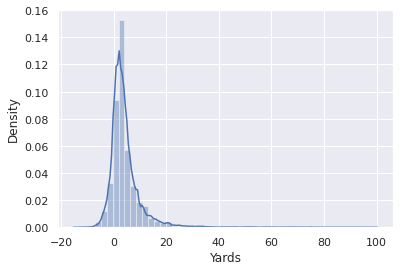

In [24]:
sns.distplot(data_raw["Yards"], kde=True)

In [25]:
data_raw["Yards"].describe()

count    509762.000000
mean          4.212334
std           6.436167
min         -14.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          99.000000
Name: Yards, dtype: float64

In [26]:
"""
The distribution looks to be skewed, as one of the tails of the graph is significantly larger than the other. Most of the values lie between
0 and approx. 10 yards, which makes sense if you know the game of football and rushing. I could not see the max yard gain from the graph alone,
so I used the describe function above and the max yard gain appears to be 99 yards. 
"""

'\nThe distribution looks to be skewed, as one of the tails of the graph is significantly larger than the other. Most of the values lie between\n0 and approx. 10 yards, which makes sense if you know the game of football and rushing. I could not see the max yard gain from the graph alone,\nso I used the describe function above and the max yard gain appears to be 99 yards. \n'

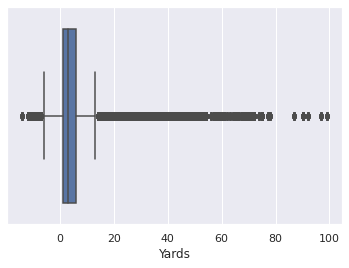

In [27]:
sns.boxplot(x = "Yards", data = data_raw)

In [28]:
"""
In comparison to the distribution plot, the boxplot shows the volume of plays that resulted in a gain of 20+ yards, whereas in the distribution
plot, I nearly assumed that the amount of such plays were near 0 due to the line being nearly close to the origin. When I did a basic boolean
filter command to filter the number of plays that resulted in greater than a 50 yard gain, I got 1518 plays. 

Something that could be potentially misleading about a boxplot is that is the majority of the datapoints take up a minimal amount of space.
The box in the plot represents the 25th - 75th percentile of datapoints, yet takes up far fewer space than the supposed "outliers" despite
representing far more datapoints. 
"""

'\nIn comparison to the distribution plot, the boxplot shows the volume of plays that resulted in a gain of 20+ yards, whereas in the distribution\nplot, I nearly assumed that the amount of such plays were near 0 due to the line being nearly close to the origin. When I did a basic boolean\nfilter command to filter the number of plays that resulted in greater than a 50 yard gain, I got 1518 plays. \n\nSomething that could be potentially misleading about a boxplot is that is the majority of the datapoints take up a minimal amount of space.\nThe box in the plot represents the 25th - 75th percentile of datapoints, yet takes up far fewer space than the supposed "outliers" despite\nrepresenting far more datapoints. \n'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


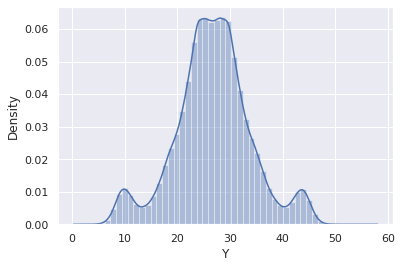

In [29]:
sns.distplot(data_raw["Y"], kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


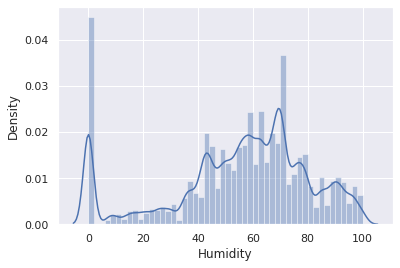

In [30]:
sns.distplot(data_raw["Humidity"], kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


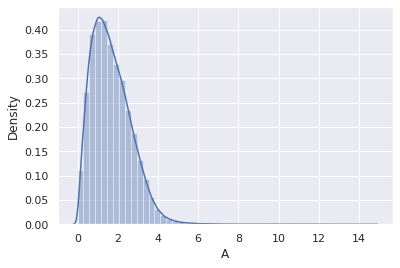

In [31]:
sns.distplot(data_raw["A"], kde=True)